In [1]:
# Define path the folder and phase excel file from RRP
directory = '/mnt/home/9.0 Data Jobs/220412-IB_coffs/' # job folder
race_phase='TestingPhases__IchiBanIRC52_20220408.xlsx' # phase report
historic_phase='HistoricData.xlsx' # phase report
race_headerRow = 6 # row number of first phase in phase report
historic_headerRow = 1 # row nuber of first phase in historic phase report

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# import using read_excel, using headercolumn as columnnames
phases_in = pd.read_excel(directory+race_phase, header=race_headerRow-1) 
phases_in = phases_in.dropna(subset=['StartTime']) # remove excess rows
hist_in = pd.read_excel(directory+historic_phase, header=historic_headerRow-1) 
hist_in = hist_in.dropna(subset=['StartTime']) # remove excess rows

# set categorical variable types
categoricalVariables = ['WaterBallast', 'SeaState', 'Sails', 'DayNight']
for var in categoricalVariables:
    phases_in[var] = phases_in[var].astype('category')
    catCount = phases_in.groupby(var).size()
    catCount = catCount/sum(catCount)
    drop = catCount[catCount < 0.01].index
    phases_in[var].cat.remove_categories(drop, inplace = True)

    

/tmp/ipykernel_27615/2774536733.py:19: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  phases_in[var].cat.remove_categories(drop, inplace = True)
/tmp/ipykernel_27615/2774536733.py:19: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  phases_in[var].cat.remove_categories(drop, inplace = True)
/tmp/ipykernel_27615/2774536733.py:19: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_categories is deprecated and will be removed in a future version. Removing unused categories will always return a new Categorical object.
  phases_in[var].cat.remove_categories(drop, inplace = True)
/tmp/ipykernel_27615/2774536733.py:19: FutureWarning: The `inplace` parameter in p

In [3]:
## build data frame to
comp_df = phases_in[phases_in.Sails == 'OM-B/R2-A/J25-C/GS-E']
comp_df = comp_df[['Sails', 'TwsBin', 'TwaBin', 'WaterBallast','BSP', 'BSPpol%', 'HEEL', 'SeaState' ]]
comp_df

,Sails,TwsBin,TwaBin,WaterBallast,BSP,BSPpol%,HEEL,SeaState
241,OM-B/R2-A/J25-C/GS-E,12,100,Full,11.82,97.3,-15.4,Rougher
242,OM-B/R2-A/J25-C/GS-E,12,100,Full,11.52,95.7,-14.3,Rougher
251,OM-B/R2-A/J25-C/GS-E,12,100,Full,11.49,98.3,-13.9,Rougher
252,OM-B/R2-A/J25-C/GS-E,12,100,Full,11.39,97.8,-16.3,Rougher
253,OM-B/R2-A/J25-C/GS-E,12,100,Empty,11.82,99.9,-17.1,Rougher
...,...,...,...,...,...,...,...,...
1303,OM-B/R2-A/J25-C/GS-E,20,130,Empty,14.34,82.9,-14,Rougher
1304,OM-B/R2-A/J25-C/GS-E,20,130,Empty,19.04,107.7,-14.6,Rougher
1305,OM-B/R2-A/J25-C/GS-E,20,140,Empty,17.94,103,-14.6,Rougher
1508,OM-B/R2-A/J25-C/GS-E,22,110,Empty,17.68,106.3,-20.7,Rougher


In [4]:
hist_in = hist_in[['Sails', 'TWS_Bin', 'TWA_Bin', 'WaterBallast','BSP', 'Pol%', 'AHEEL', 'SeaState' ]]
hist_in.rename(columns={'Sails': 'Sails', 'TWS_Bin': 'TwsBin', 'TWA_Bin': 'TwaBin', 
                        'WaterBallast': 'waterBallast', 'Pol%': 'BSPpol%', 'AHEEL':'HEEL'}, inplace=True)
hist_in

,Sails,TwsBin,TwaBin,waterBallast,BSP,BSPpol%,HEEL,SeaState
0,FR0-B,5,90,NotSet,5.65,80.7,5.3,NotSet
1,FR0-B,5,90,NotSet,5.97,85.8,5.4,NotSet
2,FR0-B,5,100,NotSet,6.25,84.9,6.4,NotSet
3,FR0-B,5,90,NotSet,6.22,84.4,6.5,NotSet
4,FR0-B,5,100,NotSet,6.21,83.4,7.6,NotSet
...,...,...,...,...,...,...,...,...
849,FR0-A,26,130,NotSet,17.38,86.0,13.1,NotSet
850,FR0-A,26,130,NotSet,17.51,85.8,15.3,NotSet
851,FR0-B,26,130,NotSet,19.80,100.7,19.1,Rough
852,FR0-A,26,120,NotSet,18.52,96.1,19.0,NotSet


In [5]:
comp_df = pd.concat([comp_df, hist_in], ignore_index=True)

In [6]:
comp_df['HEEL'] = abs(comp_df.HEEL)
comp_df['Sails'].replace({'OM-B/R2-A/J25-C/GS-E': 'R2', 
                          'FR0-B': 'FR0', 'FR0-A' : 'FR0', 'FR0-B/1 reef': 'FR0'}, 
                         inplace=True)



In [7]:
comp_df = comp_df[comp_df['BSPpol%']< 120]

In [8]:
allDist = sns.displot(comp_df, x='BSPpol%', kind='kde', hue='Sails')
allDist.set(title = "Distribution of Polar BSP % for FR0 and R2")
sns.despine
plt.savefig('allDist.png', bbox_inches='tight') # save plot
plt.clf() # close plot figure so it is not over plotted

<Figure size 415x360 with 0 Axes>

In [9]:
binPlt = sns.catplot(x='Sails', kind='count', data=comp_df)
binPlt.set(title = "Bin Count for R2 and FR0 phases")
sns.despine
plt.savefig('BinCount.png', bbox_inches='tight') # save plot
plt.clf() # close plot figure so it is not over plotted

<Figure size 360x360 with 0 Axes>

In [10]:
twsBin = sns.catplot(y='TwsBin', hue='Sails', kind='count', data=comp_df)
twsBin.set(title = "Bin Count for R2 and FR0 phases by TWS")
sns.despine
plt.savefig('twsBinCount.png', bbox_inches='tight') # save plot
plt.clf() # close plot figure so it is not over plotted

<Figure size 415x360 with 0 Axes>

In [11]:
twaBin = sns.catplot(x='TwaBin', hue='Sails', kind='count', data=comp_df)
twaBin.set(title = "Bin Count for R2 and FR0 phases by TWA")
sns.despine
plt.savefig('twaBinCount.png', bbox_inches='tight') # save plot
plt.clf() # close plot figure so it is not over plotted

<Figure size 415x360 with 0 Axes>

In [12]:

fr0_BSPpol = comp_df[comp_df.Sails == 'FR0']
r2_BSPpol = comp_df[comp_df.Sails == 'R2']
tTest = stats.ttest_ind(fr0_BSPpol['BSPpol%'], r2_BSPpol['BSPpol%'])
test_plot = sns.displot(comp_df, x='BSPpol%', hue='Sails', kind='kde', palette = ['red','blue'] )
avg = comp_df.groupby(['Sails']).mean()['BSPpol%']
plt.axvline(x=avg[0], color = 'blue')
plt.axvline(x=avg[1], color = 'red')
test_plot.set(title = 'R2 vs FR0 for all TWS and TWA, p-value= '+str(tTest[1])) # set title
sns.despine
plt.savefig('all_testPlot.png', bbox_inches='tight') # save plot
plt.clf() # close plot figure so it is not over plotted
print('blue'+str(avg[0]))
print('red'+str(avg[1]))

blue96.50480656506446
red98.90891719745228


/tmp/ipykernel_27615/3462466155.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = comp_df.groupby(['Sails']).mean()['BSPpol%']


<Figure size 415x360 with 0 Axes>

In [164]:
for twa in [100,110,120,130]:
    try:
        test_df = comp_df
        test_df = test_df[test_df.TwaBin == twa]
        fr0_BSPpol = test_df[test_df.Sails == 'FR0']
        r2_BSPpol = test_df[test_df.Sails == 'R2']
        tTest = stats.ttest_ind(fr0_BSPpol['BSPpol%'], r2_BSPpol['BSPpol%'])
        test_plot = sns.displot(test_df, x='BSPpol%', hue='Sails', kind='kde', palette = ['red','blue'] )
        avg = test_df.groupby(['Sails']).mean()['BSPpol%']
        plt.axvline(x=avg[0], color = 'blue')
        plt.axvline(x=avg[1], color = 'red')
        test_plot.set(title = 'TWA='+str(twa)+' For all TWS, p-value='+str(tTest[1])) # set title
        sns.despine
        plt.savefig(str(twa)+'_'+'allTWS_testPlot.png', bbox_inches='tight') # save plot
        plt.clf() # close plot figure so it is not over plotted
    except:
        print(twa)

/tmp/ipykernel_1904/3064111205.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/tmp/ipykernel_1904/3064111205.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/tmp/ipykernel_1904/3064111205.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/tmp/ipykernel_1904/3064111205.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

In [177]:
for tws in [12,14,16,18,20]:
    try:
        test_df = comp_df
        test_df = test_df[test_df.TwsBin == tws]
        fr0_BSPpol = test_df[test_df.Sails == 'FR0']
        r2_BSPpol = test_df[test_df.Sails == 'R2']
        tTest = stats.ttest_ind(fr0_BSPpol['BSPpol%'], r2_BSPpol['BSPpol%'])
        test_plot = sns.displot(test_df, x='BSPpol%', hue='Sails', kind='kde', palette = ['red','blue'] )
        avg = test_df.groupby(['Sails']).mean()['BSPpol%']
        plt.axvline(x=avg[0], color = 'blue')
        plt.axvline(x=avg[1], color = 'red')
        test_plot.set(title = ' TWS='+str(tws)+ ' For all TWA, p-value='+str(tTest[1])) # set title
        sns.despine
        plt.savefig(str(tws)+'_'+'allTWA_testPlot.png', bbox_inches='tight') # save plot
        plt.clf() # close plot figure so it is not over plotted
    except:
        print(twa)

/tmp/ipykernel_1904/1405187093.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/tmp/ipykernel_1904/1405187093.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/tmp/ipykernel_1904/1405187093.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/tmp/ipykernel_1904/1405187093.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

/tmp/ipykernel_1904/179405770.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/tmp/ipykernel_1904/179405770.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']


TWA 100 TWS 16
TWA 100 TWS 18
TWA 100 TWS 20


/tmp/ipykernel_1904/179405770.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/tmp/ipykernel_1904/179405770.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/tmp/ipykernel_1904/179405770.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/tmp/ipykernel_1904/179405770.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean

TWA 130 TWS 12


/tmp/ipykernel_1904/179405770.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/tmp/ipykernel_1904/179405770.py:9: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg = test_df.groupby(['Sails']).mean()['BSPpol%']
/home/veering/anaconda3/envs/veeringReports/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/veering/anaconda3/envs/veeringReports/lib/python3.10/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in true_divide
  ret = ret / rco

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

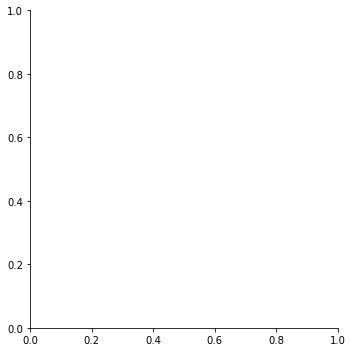

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

<Figure size 415x360 with 0 Axes>

In [178]:
for twa in [100,110,120,130]:
    for tws in [12, 14,16,18,20]:
        try:
            test_df = comp_df[(comp_df.TwaBin == twa) & (comp_df.TwsBin == tws)]
            fr0_BSPpol = test_df[test_df.Sails == 'FR0']
            r2_BSPpol = test_df[test_df.Sails == 'R2']
            tTest = stats.ttest_ind(fr0_BSPpol['BSPpol%'], r2_BSPpol['BSPpol%'])
            test_plot = sns.displot(test_df, x='BSPpol%', hue='Sails', kind='kde', palette = ['red','blue'] )
            avg = test_df.groupby(['Sails']).mean()['BSPpol%']
            plt.axvline(x=avg[0], color = 'blue')
            plt.axvline(x=avg[1], color = 'red')
            test_plot.set(title = 'TWA='+str(twa)+' TWS='+str(tws)+ ', p-value='+str(tTest[1])) # set title
            sns.despine
            plt.savefig(str(twa)+'_'+str(tws)+'_testPlot.png', bbox_inches='tight') # save plot
            plt.clf() # close plot figure so it is not over plotted
        except:
            print("TWA "+str(twa)+" TWS "+str(tws))